In [5]:
#importing dataset kaggle to google collab
!pip install opendatasets
import opendatasets as op
op.download("https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: fardinkaiser
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset


100%|██████████| 788M/788M [00:04<00:00, 206MB/s] 


In [43]:
import tensorflow as tf
import os
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [32]:
# ✅ CLEANING CORRUPT IMAGES (Do this FIRST)
dataset_dir = "/content/microsoft-catsvsdogs-dataset/PetImages"
num_skipped = 0

for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join(dataset_dir, folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            with open(fpath, "rb") as fobj:
                is_jfif = fobj.read(10)[:3] == b'\xff\xd8\xff'
            if not is_jfif:
                os.remove(fpath)
                num_skipped += 1
        except:
            os.remove(fpath)
            num_skipped += 1

print(f"✅ Deleted {num_skipped} corrupt images")

✅ Deleted 0 corrupt images


In [33]:
# Training dataset
train_ds = keras.utils.image_dataset_from_directory(
    dataset_dir,
    labels = "inferred",
    label_mode = "int",
    validation_split=0.2,      # 20% will go to validation
    subset="training",
    seed=123,                  # to ensure the same split every time
    image_size=(128, 128),
    batch_size=32
)

# Validation dataset
val_ds = keras.utils.image_dataset_from_directory(
    dataset_dir,
    labels = "inferred",
    label_mode = "int",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)


Found 24769 files belonging to 2 classes.
Using 19816 files for training.
Found 24769 files belonging to 2 classes.
Using 4953 files for validation.


In [34]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [35]:
#CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding="valid", activation="relu", input_shape = (128,128,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = "valid"))

model.add(Conv2D(64, kernel_size = (3,3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = "valid"))

model.add(Conv2D(128, kernel_size = (3,3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = "valid"))

model.add(Flatten())

model.add(Dense(128, activation = "relu" ))
model.add(Dense(64, activation = "relu" ))
model.add(Dense(1, activation = "sigmoid" ))

In [36]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,312,961 (12.64 MB)

 Trainable params: 3,312,961 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer= "adam", loss = "binary_crossentropy", metrics= ["accuracy"])

In [38]:
history = model.fit(train_ds ,epochs=10, validation_data= val_ds)

Epoch 1/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.5653 - loss: 0.6736 - val_accuracy: 0.7309 - val_loss: 0.5333
Epoch 2/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.7413 - loss: 0.5181 - val_accuracy: 0.7846 - val_loss: 0.4639
Epoch 3/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.8035 - loss: 0.4270 - val_accuracy: 0.8130 - val_loss: 0.4130
Epoch 4/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.8326 - loss: 0.3747 - val_accuracy: 0.8173 - val_loss: 0.4071
Epoch 5/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8711 - loss: 0.3009 - val_accuracy: 0.8197 - val_loss: 0.4624
Epoch 6/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.9014 - loss: 0.2294 - val_accuracy: 0.8126 - val_loss: 0.5473
Epoch 7/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.9331 - loss: 0.1599 - val_accuracy: 0.8171 - val_loss: 0.6710
Epoch 8/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.9564 - loss: 0.1131 - 

In [46]:
# Plot training history
def plot_training_history(history):
    """Plot training and validation accuracy and loss"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Accuracy
    ax1.plot(history.history['accuracy'], 'bo-', label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

 # Loss
    ax2.plot(history.history['loss'], 'bo-', label='Training Loss')
    ax2.plot(history.history['val_loss'], 'ro-', label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)


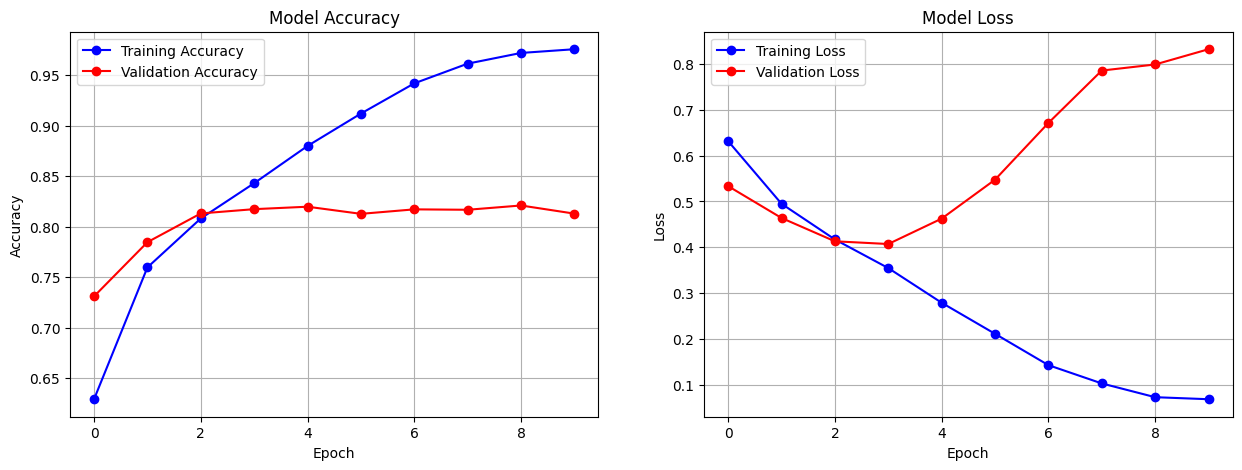

In [47]:
plot_training_history(history)